In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("final-dataset.csv")

In [3]:
data.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,4,11339,16091,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,16,6274,16092,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,16,1930,16092,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,10,12670,16085,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,9,4901,16088,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


C:\Users\Surya R\AppData\Local\Temp\ipykernel_9792\2133705355.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


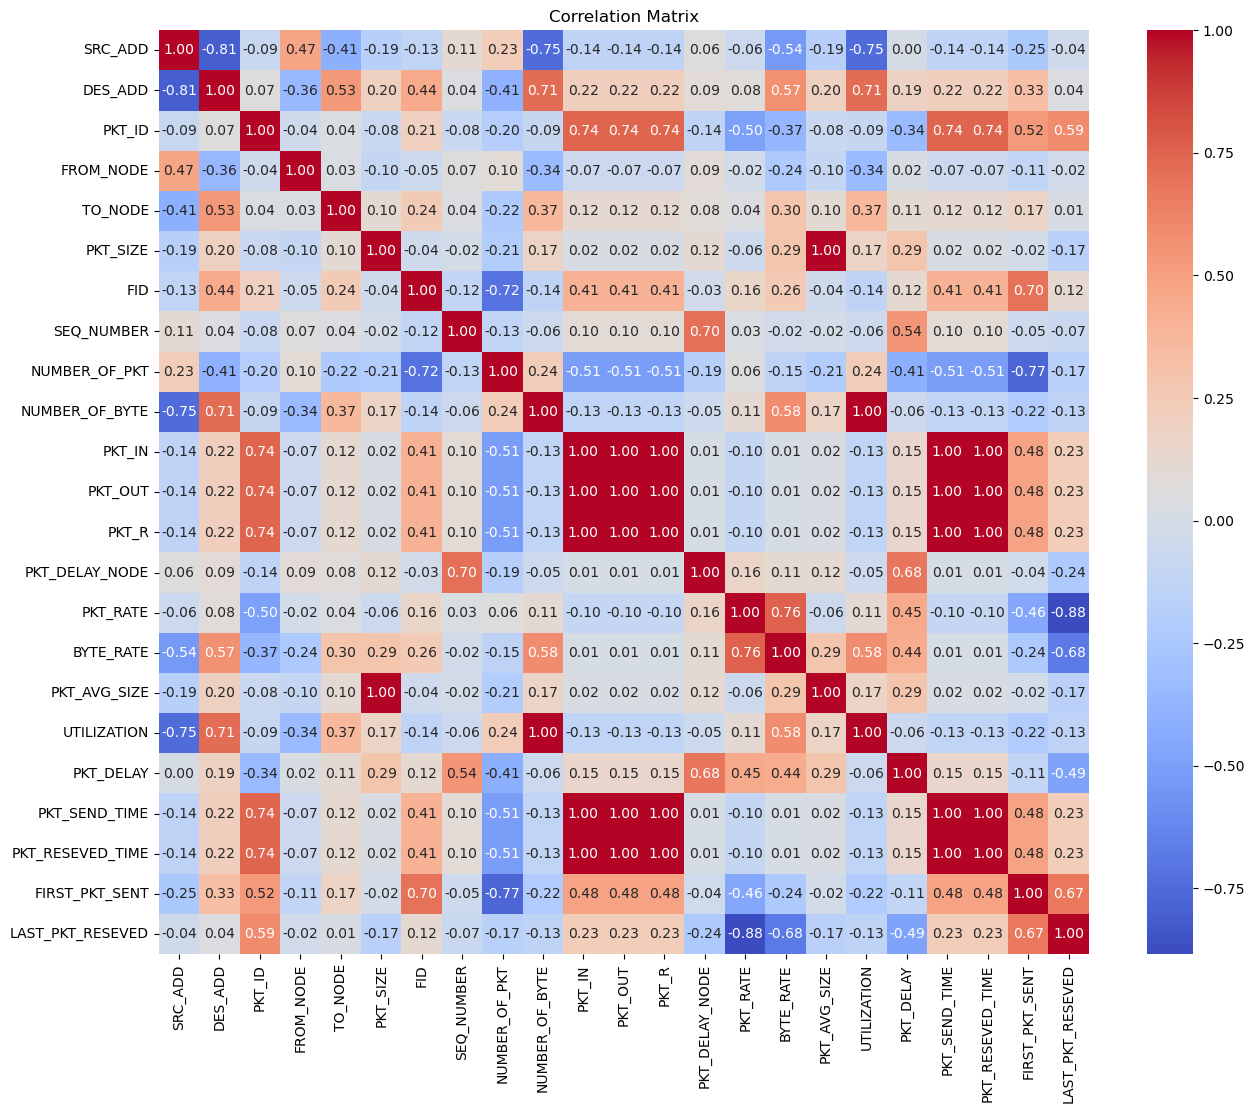

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


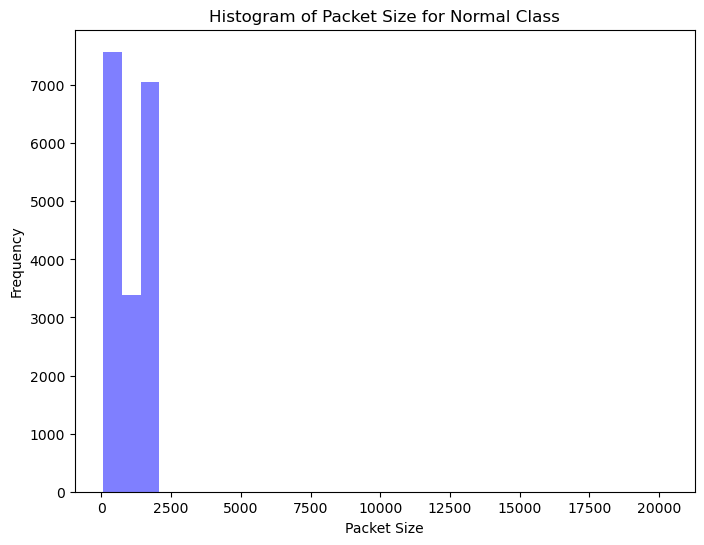

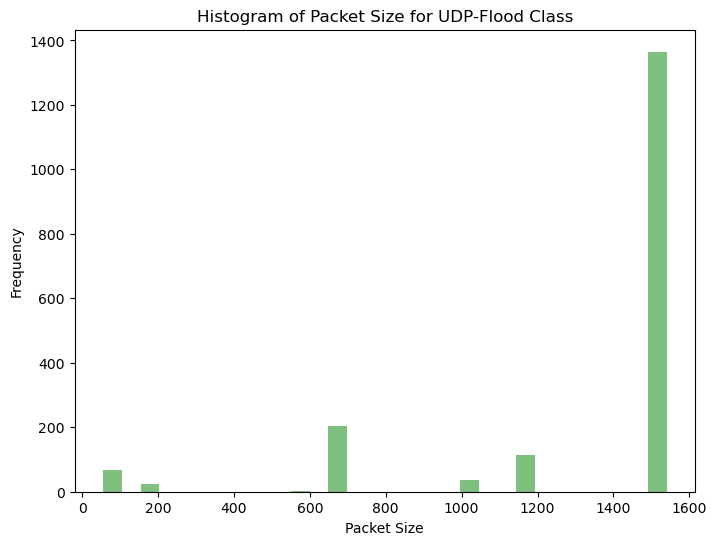

In [12]:
normal_data = data[data['PKT_CLASS'] == 'Normal']
# Filter data for the 'UDP-Flood' class
udp_flood_data = data[data['PKT_CLASS'] == 'UDP-Flood']

# Plot histogram for Normal class
plt.figure(figsize=(8, 6))
plt.hist(normal_data['PKT_SIZE'], bins=30, alpha=0.5, color='blue')
plt.xlabel('Packet Size')
plt.ylabel('Frequency')
plt.title('Histogram of Packet Size for Normal Class')
plt.show()

# Plot histogram for UDP-Flood class
plt.figure(figsize=(8, 6))
plt.hist(udp_flood_data['PKT_SIZE'], bins=30, alpha=0.5, color='green')
plt.xlabel('Packet Size')
plt.ylabel('Frequency')
plt.title('Histogram of Packet Size for UDP-Flood Class')
plt.show()



In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20079 entries, 0 to 20078
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SRC_ADD           20079 non-null  float64
 1   DES_ADD           20079 non-null  float64
 2   PKT_ID            20079 non-null  int64  
 3   FROM_NODE         20079 non-null  int64  
 4   TO_NODE           20079 non-null  int64  
 5   PKT_TYPE          20079 non-null  object 
 6   PKT_SIZE          20079 non-null  int64  
 7   FID               20079 non-null  int64  
 8   SEQ_NUMBER        20079 non-null  int64  
 9   NUMBER_OF_PKT     20079 non-null  int64  
 10  NUMBER_OF_BYTE    20079 non-null  int64  
 11  NODE_NAME_FROM    20079 non-null  object 
 12  NODE_NAME_TO      20079 non-null  object 
 13  PKT_IN            20079 non-null  float64
 14  PKT_OUT           20079 non-null  float64
 15  PKT_R             20079 non-null  float64
 16  PKT_DELAY_NODE    20079 non-null  float6

In [30]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20079 entries, 0 to 20078
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SRC_ADD           20079 non-null  float64
 1   DES_ADD           20079 non-null  float64
 2   PKT_ID            20079 non-null  int64  
 3   FROM_NODE         20079 non-null  int64  
 4   TO_NODE           20079 non-null  int64  
 5   PKT_TYPE          20079 non-null  int32  
 6   PKT_SIZE          20079 non-null  int64  
 7   FID               20079 non-null  int64  
 8   SEQ_NUMBER        20079 non-null  int64  
 9   NUMBER_OF_PKT     20079 non-null  int64  
 10  NUMBER_OF_BYTE    20079 non-null  int64  
 11  NODE_NAME_FROM    20079 non-null  int32  
 12  NODE_NAME_TO      20079 non-null  int32  
 13  PKT_IN            20079 non-null  float64
 14  PKT_OUT           20079 non-null  float64
 15  PKT_R             20079 non-null  float64
 16  PKT_DELAY_NODE    20079 non-null  float6

In [32]:
X = data.drop('PKT_CLASS',axis=1)
Y = data['PKT_CLASS']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

l = len(X)
print(l)

20079


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [35]:
# Define the individual classifiers
knn_model = KNeighborsClassifier(n_neighbors=1)
rf_model = RandomForestClassifier(n_estimators=500)

In [36]:
# Create the hybrid model using VotingClassifier
hybrid_model = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('rf', rf_model)
], voting='hard')


In [37]:
# Train the hybrid model
hybrid_model.fit(X_train, Y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [38]:
# Make predictions using the hybrid model
Y_pred_hybrid = hybrid_model.predict(X_test)

In [39]:
# Evaluate the hybrid model
accuracy_hybrid = accuracy_score(Y_pred_hybrid, Y_test)
precision_hybrid = precision_score(Y_test, Y_pred_hybrid, average='weighted')
recall_hybrid = recall_score(Y_test, Y_pred_hybrid, average='weighted')
print("Accuracy of the hybrid model:", accuracy_hybrid * 100, "%")
print("Precision of the hybrid model:", precision_hybrid)
print("Recall of the hybrid model:", recall_hybrid)

Accuracy of the hybrid model: 98.2569721115538 %
Precision of the hybrid model: 0.9825937184219931
Recall of the hybrid model: 0.9825697211155379


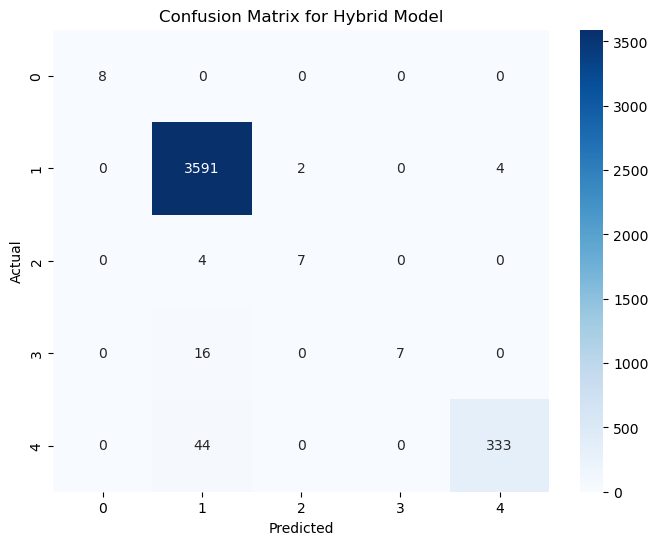

In [40]:
# Plot confusion matrix for the hybrid model
cm = confusion_matrix(Y_test, Y_pred_hybrid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Hybrid Model')
plt.show()

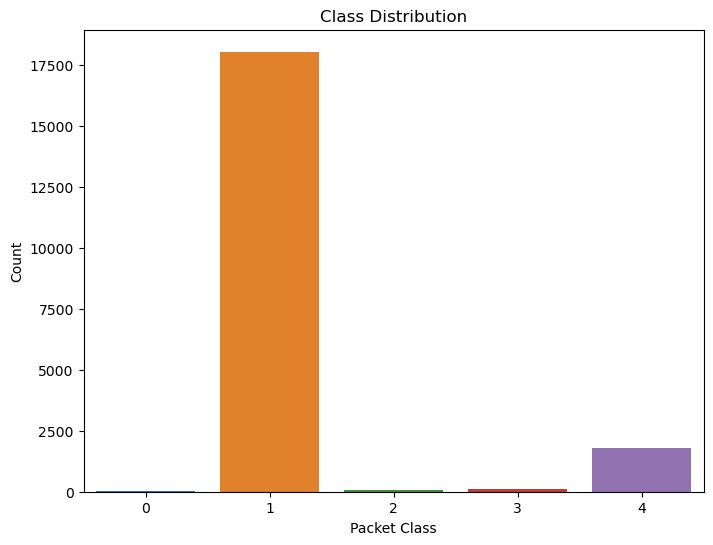

In [48]:
# Example: Bar chart of class distribution
class_distribution = data['PKT_CLASS'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Packet Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

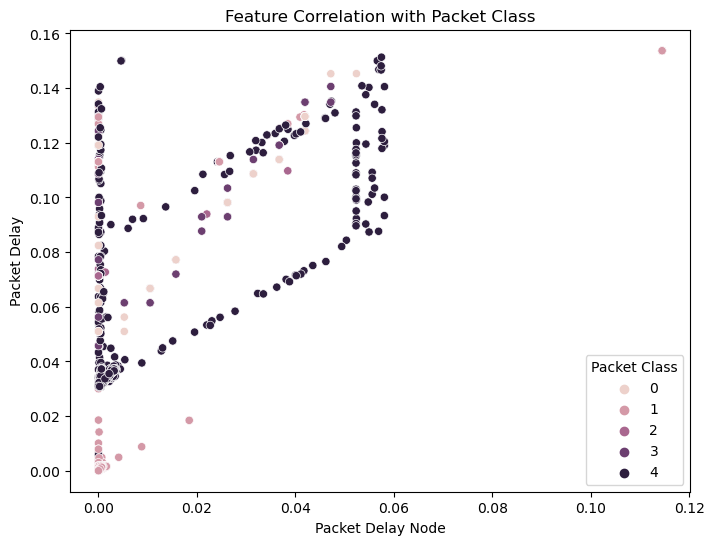

In [47]:
# Example: Scatter plot of feature correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PKT_DELAY_NODE'], y=data['PKT_DELAY'], hue=data['PKT_CLASS'])
plt.xlabel('Packet Delay Node')
plt.ylabel('Packet Delay')
plt.title('Feature Correlation with Packet Class')
plt.legend(title='Packet Class')
plt.show()